<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/Diferencias_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diferencias progresivas**

Use los tamaños de paso a) $h = 0.1$  y $k = 0.0005$ para aproximar la solución de la ecuación de calor

$$
\frac{\partial u}{\partial t}(x,t) - \frac{\partial^2 u}{\partial x^2}(x,t) =0, \; 0 < x < 1, \; 0\leq t,
$$

con condiciones de frontera

$$ u(x,t) = u(1,t)=0, \; 0 < t, $$

y con condiciones iniciales

$$ u(x,0)= \sin(\pi x), \; 0 \leq x \leq 1 $$

Compare los resultas en $t=0.5$ con la solución exacta

$$u(x,t) = e^{-{\pi^2}t} \sin({\pi} x)$$





**Método explícito:**


$$U_{i,j+1} = \left( 1 - \frac{2 \alpha^2 k}{h^2} \right)U_{i,j} + \alpha^2 \frac{k}{h^2} \left( U_{i-1,j}+ U_{i+1,j} \right)$$

---

a)$h = 0.1 \text{ y } k=0.0005$

In [261]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [262]:
#Parametros/Valores del Ejercicio

L = 1 #Longitud de la barra
h = 0.1 #Tamaño de h/paso
T = 0.5 #Tiempo
a = 1

In [263]:
#Hacer la malla
x = np.arange(0, L + h, h)
n = len(x)
print(x) #Para checar

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Solución exacta:  

$$u(x,t) = e^{-{\pi^2}t} \sin({\pi} x)$$

In [264]:
#Definir la solución exacta
exac = np.exp(-np.pi**2 * T) * np.sin(np.pi * x)

In [265]:
#Caso a)
ka = 0.0005
coefa = (a**2)*(ka/h**2)
nta = int(T/ka)

Condiciones iniciales:

$$u(x,0)= \sin(\pi x), \; 0 \leq x \leq 1 $$

In [266]:
#Definir la condición inicial
ua = np.sin(np.pi * x)

In [267]:
#Se inicia con el metodo
ua[0] = 0
ua[-1] = 0

#Ciclo for, para iterar
for j in range(nta):
    ua_n = ua.copy() #Se aplica la formula
    for i in range(1, n-1): #U_i,j+1 = (1- 2a^2k/h^2)U_i,j + a^2 k/h^2(U_i-1,j + Ui+1,j)
        ua_n[i] = (1 - 2*coefa)*ua[i] + coefa*(ua[i+1] + ua[i-1])
    ua = ua_n #Se le asigna el valor de ua_n a ua

ua_f = ua.copy() #Se copia el valor de ua en ua_f

#Se imprime ua para ver los valores, que después se pondrán en la tabla
print(ua)

[0.         0.00228652 0.00434922 0.00598619 0.00703719 0.00739934
 0.00703719 0.00598619 0.00434922 0.00228652 0.        ]


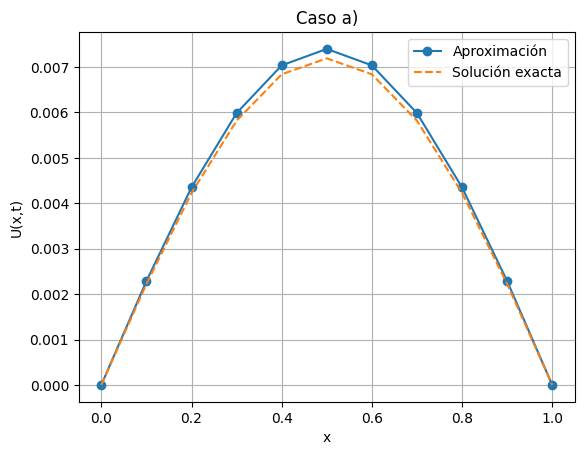

In [268]:
#Gráfica
plt.plot(x, ua, 'o-', label='Aproximación')
plt.plot(x, exac, '--', label='Solución exacta')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.grid(True)
plt.legend()
plt.title('Caso a)')
plt.show()

$b) h =0.1$ y $k=0.01$

In [269]:
#Caso b)
kb = 0.01
coefb = (a**2)*(kb/h**2)
ntb = int(T/kb)
print( ntb)

50


In [270]:
#Definir la solución inicial
ub = np.sin(np.pi * x)

In [271]:
#Se inicia con el método
ub[0] = 0
ub[-1] = 0

#Ciclo for, para iterar, con 50 pasos
for j in range(ntb):
    ub_n = ub.copy()
    for i in range(1, n-1): #U_i,j+1 = (1- 2a^2k/h^2)U_i,j + a^2 k/h^2(U_i-1,j + Ui+1,j)
        ub_n[i] = (1 - 2*coefb)*ub[i] + coefb*(ub[i+1] + ub[i-1])
    ub = ub_n

ub_f = ub.copy()

#Para ver lo que nos dio
print(ub)

[       0.          1850631.15940172 -3515989.05792673  4830509.77168028
 -5665518.017289    5941823.57007753 -5636500.75480063  4783558.85471489
 -3469038.14096294  1821613.89691592        0.        ]


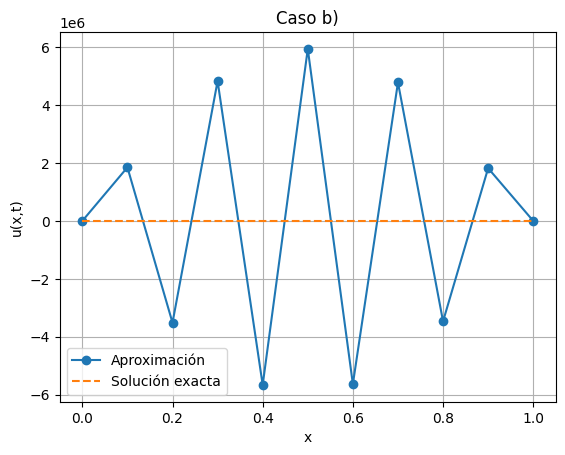

In [272]:
#Gráfica
plt.plot(x, ub, 'o-', label='Aproximación')
plt.plot(x, exac, '--', label='Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)
plt.legend()
plt.title('Caso b)')
plt.show()

In [273]:
#Calcular error para el caso a) y b)
ea = np.abs(exac - ua_f)
eb = np.abs(exac - ub_f)

In [274]:
#Hacer tabla
print(f"Diferencias progresivas")
print(f"{'x_i':<5}  {'u(x_i, 0.5)':<12}  {'k=0.0005':<12}  {'Error a)':<10}  {'k = 0.01':<12}  {'Error b)':<12}")

for i in range(len(x)):
    print(f"{x[i]:<5.1f}  {exac[i]:<12.8f}  {ua_f[i]:<12.8f}  {ea[i]:<10.3e}  {ub_f[i]:<12.3e}  {eb[i]:<12.3e}")
print("\n")

Diferencias progresivas
x_i    u(x_i, 0.5)   k=0.0005      Error a)    k = 0.01      Error b)    
0.0    0.00000000    0.00000000    0.000e+00   0.000e+00     0.000e+00   
0.1    0.00222241    0.00228652    6.411e-05   1.851e+06     1.851e+06   
0.2    0.00422728    0.00434922    1.219e-04   -3.516e+06    3.516e+06   
0.3    0.00581836    0.00598619    1.678e-04   4.831e+06     4.831e+06   
0.4    0.00683989    0.00703719    1.973e-04   -5.666e+06    5.666e+06   
0.5    0.00719188    0.00739934    2.075e-04   5.942e+06     5.942e+06   
0.6    0.00683989    0.00703719    1.973e-04   -5.637e+06    5.637e+06   
0.7    0.00581836    0.00598619    1.678e-04   4.784e+06     4.784e+06   
0.8    0.00422728    0.00434922    1.219e-04   -3.469e+06    3.469e+06   
0.9    0.00222241    0.00228652    6.411e-05   1.822e+06     1.822e+06   
1.0    0.00000000    0.00000000    8.808e-19   0.000e+00     8.808e-19   




Le asignamos el valor de lambda,se necesita calcular

$$λ = \alpha^2 \frac{k}{h^2}$$

ya el método es  que es sensible a este valor, calcular para cada caso.

Aunque ya se había calculado antes en el código, por practicidad se vuelve a calcular.

**Para el caso a)**

In [275]:
#Caso a)
aca = 1
kca = 0.0005
hca = 0.1

lamb = (aca**2)*(kca/hca**2)
print(lamb)

0.04999999999999999


**Para el caso b)**

In [276]:
#Caso b)
acb = 1
kcb = 0.01
hcb = 0.1

lamb_b = (acb**2)*(kcb/hcb**2)
print(lamb_b)

0.9999999999999998


Es **estable** si

$$λ \leq 0.5 $$

de otro modo, es **inestable**.

---

En el caso a)

$$0.0499999 \leq 0.5 $$

entonces es **estable**.




En el caso b)

$$0.99999 \leq 0.5 $$

no se cumple,entonces es **inestable**.